In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"


In [2]:
# Read the City  Data
city_data=    pd.read_csv(city_data_to_load,sep=',')
#print(city_data.head())

In [3]:
#Read the  Ride Data
ride_data=    pd.read_csv(ride_data_to_load,sep=',')
#print(ride_data.head())


# Combine the data into a single dataset

In [4]:
# Combine the data into a single dataset
#city_ride_data=city_data.merge(ride_data, on='city')
city_ride_data=pd.merge(ride_data, city_data, how='left', on=['city','city'])

# Display the data table for preview
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:

city_summary=city_ride_data.groupby(['type','city'])
city_fare_df=city_summary['fare'].mean().reset_index()
city_ride_df=city_summary['ride_id'].count().reset_index()
#print(city_ride_df.head())
city_driver_df=city_data.sort_values(by=['type','city'])
#print(city_driver_df.head())

In [6]:
city_types=city_data['type']
city_df=city_fare_df.merge(city_ride_df, on=['city','type']).merge(city_driver_df, on=['city','type'])
city_df.columns=['Type','City','Average Fare','Total Number of Rides','Total Number of Drivers']
#city_df.head()

# Bubble Plot of Ride Sharing Data

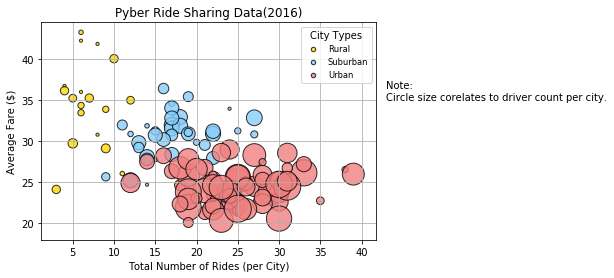

In [7]:
color_set=['gold','lightskyblue','lightcoral']
i=0

type_df=city_df.groupby('Type')

#type_df.sort_index(ascending=False)
for g , grp in type_df:
    plt.scatter(grp['Total Number of Rides'],grp['Average Fare'],
                s=grp['Total Number of Drivers']*10, 
                alpha=0.8,
                label=g,
                edgecolors='k',
                color=color_set[i]
               )
    i+=1

lgnd=plt.legend(title='City Types',fontsize='small')
lgnd.legendHandles[0]._sizes=[20]
lgnd.legendHandles[1]._sizes=[20]
lgnd.legendHandles[2]._sizes=[20]

plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (per City)')
plt.title('Pyber Ride Sharing Data(2016)')
plt.text(43,35, 'Note:\nCircle size corelates to driver count per city.')
plt.grid(True)

plt.savefig('BPlot_Ridesharing.png',bbox_inches='tight')
plt.show()

# Total Fares by City Type


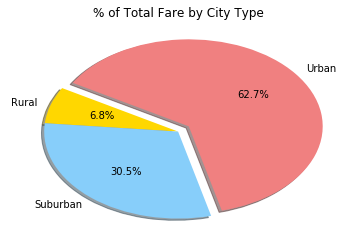

In [8]:
# Calculate Type Percents
city_type_summary=city_ride_data.groupby('type')
city_type_fare_df=city_type_summary['fare'].sum().reset_index()
city_type_fare_df.columns=['type','total fare']
city_type_fare_df['Percentage'] = round((city_type_fare_df['total fare'] / city_type_fare_df['total fare'].sum())*100,1)
#print(city_type_df)

# Build Pie Chart

plt.title("% of Total Fare by City Type")
plt.pie(city_type_fare_df['Percentage'], labels=city_type_fare_df['type'], 
                                    autopct='%1.1f%%',
                                    shadow=True,
                                    explode=(0, 0,0.1), 
                                    colors=color_set
                                    ,startangle=150
        )

# Save Figure
plt.savefig('PiePlot_FareByCity.png')
plt.show()

# Total Rides by City Type

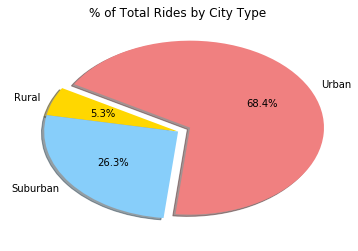

In [9]:
# Calculate Ride Percents
city_type_summary=city_ride_data.groupby('type')
city_type_ride_df=city_type_summary['ride_id'].count().reset_index()

city_type_ride_df.columns=['type','total rides']
city_type_ride_df['Percentage'] = round((city_type_ride_df['total rides'] / city_type_ride_df['total rides'].sum())*100,1)

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(city_type_ride_df['Percentage'], labels=city_type_ride_df['type'], 
                                    autopct='%1.1f%%',
                                    shadow=True,
                                    explode=(0, 0,0.1), 
                                    colors=color_set
                                    ,startangle=150
        )

# Save Figure
plt.savefig('PiePlot_RidesByCity.png')
plt.show()


# Total Drivers by City Type

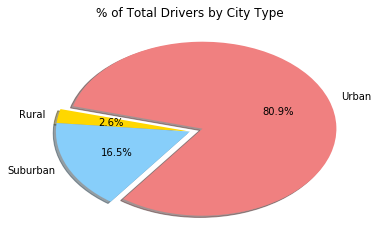

In [10]:
# Calculate Driver Percents
city_data_summary=city_data.groupby(['type'])
city_type_driver_df=city_data_summary['driver_count'].sum().reset_index()
city_type_driver_df.columns=['type','total drivers']
city_type_driver_df['Percentage'] = round((city_type_driver_df['total drivers'] / city_type_driver_df['total drivers'].sum())*100,1)
city_type_driver_df

# Build Pie Charts
plt.title("% of Total Drivers by City Type")
plt.pie(city_type_driver_df['Percentage'], labels=city_type_driver_df['type'], 
                                    autopct='%1.1f%%',
                                    shadow=True,
                                    explode=(0, 0,0.1), 
                                    colors=color_set
                                    ,startangle=165
        )

# Save Figure
plt.savefig('PiePlot_DriversByCity.png')
plt.show()

# 3 Observable Trend

### 1. Urban cities have more drivers almost 5 times the drivers in Suburban cities, and almost 30times more drivers then in Rural cities.

### 2.  Fares in Urban cities are almost double the fairs in Suburban cities
### 3.  Although Rural drivers are only 2.6% of total drivers, but they get 6.8% (more then 2% or total income per driver) of the total revenue, so More Income Per Driver.  This is in comparison to the Urban drivers who are about 81% of the total driver count but get only less then 63% of the total revenue(less then 1% of total income per driver).